<a href="https://colab.research.google.com/github/chaurasiauttkarsh/Deep-Learning-Tensorflow-Projects/blob/master/MNIST_using_CNN_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing The Libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

1.15.0


**Loading the Data**

```
The Fashion MNIST data is available directly in the tf.keras datasets API
```



In [0]:
mnist = tf.keras.datasets.mnist

**Training and Testing Split of Data**

```
Training = 60000 Samples
Testing = 10000 Samples
```



In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print("Training Image Size {}".format(training_images.shape))
print("Training Labels Size {}".format(training_labels.shape))
print("Test Image Size {}".format(test_images.shape))
print("Test Labels Size {}".format(test_labels.shape))

Training Image Size (60000, 28, 28)
Training Labels Size (60000,)
Test Image Size (10000, 28, 28)
Test Labels Size (10000,)


**Visualising the Data**

Image Label 0


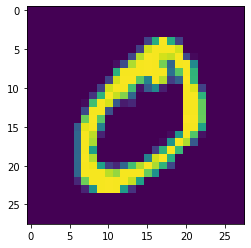

In [5]:
import matplotlib.pyplot as plt
plt.imshow(training_images[1])
print("Image Label {}".format(training_labels[1]))

**Normalizing the Data**

In [0]:
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

**Defining The Model**



In [7]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax')])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________

**Compliling the Model**

```
optimizer = Stochastic Gradient Descent
loss = Mean Squared Error
metrices = [accuracy]
```




In [0]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('sparse_categorical_accuracy') > 0.998):
                print("\nReached 99.8% greater accuracy so cancelling training!")
                self.model.stop_training = True
callbacks = myCallback()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

**Training the Model**

In [11]:
history = model.fit(training_images, training_labels, epochs = 20, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.0602 - sparse_categorical_accuracy: 0.9807
Epoch 2/20
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.0320 - sparse_categorical_accuracy: 0.9897
Epoch 3/20
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.0226 - sparse_categorical_accuracy: 0.9932
Epoch 4/20
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.0157 - sparse_categorical_accuracy: 0.9949
Epoch 5/20
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.0135 - sparse_categorical_accuracy: 0.9956
Epoch 6/20
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.0103 - sparse_categorical_accuracy: 0.9965
Epoch 7/20
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.0084 - sparse_categorical_accuracy: 0.9972
Epoch 8/20
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.0068 - spars

**Evaluating the Model**

In [12]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 4s 406us/sample - loss: 0.0286 - sparse_categorical_accuracy: 0.9926


[0.028565820879499187, 0.9926]